# <center>Тема 2. Визуальный анализ данных с Python
## <center>Часть 3. Рисуем на карте


В начале как всегда настроим окружение: импортируем все необходимые библиотеки и немного настроим дефолтное отображение картинок.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.path as mplPath
import pandas as pd
import numpy as np
import plotly.express as px

import folium
from folium.plugins import MarkerCluster

import requests
import json

## Folium

Запомним координаты города

In [2]:
mos_center = [55.750475, 37.619020]
mos_min_lat, mos_max_lat = 55.564141, 55.908930
mos_min_lon, mos_max_lon = 37.344362, 37.879945

И сгенерируем случайные места

In [3]:
data_moscow = pd.DataFrame({'latitude': np.random.uniform(mos_min_lat,mos_max_lat,size=1500),
                            'longitude': np.random.uniform(mos_min_lon,mos_max_lon,size=1500)})
data_moscow.shape

(1500, 2)

In [4]:
data_moscow.head()

,latitude,longitude
0,55.584092,37.437362
1,55.680466,37.840681
2,55.839964,37.647061
3,55.570850,37.436306
4,55.577718,37.578478


Создадим карту с начальной позицией

In [5]:
moscow = folium.Map(location=mos_center, zoom_start=10, control_scale=True)

И добавим маркеры в кластер

In [6]:
marker_cluster = MarkerCluster(locations=data_moscow.loc[::2, 'latitude':'longitude'].values)
marker_cluster.add_to(moscow)

In [7]:
moscow

Теперь посмотрим на точки в пределах МКАД

In [8]:
res = requests.get('http://pastebin.com/raw/DKgMrxqF')

In [9]:
mkad = np.array(json.loads(res.text)[0])

In [10]:
data_moscow['points'] = list(zip(data_moscow.latitude, data_moscow.longitude))
data_moscow.head()

,latitude,longitude,points
0,55.584092,37.437362,"(55.584092202125696, 37.437362024506434)"
1,55.680466,37.840681,"(55.680465683327405, 37.84068070159573)"
2,55.839964,37.647061,"(55.839963592408864, 37.647060502814355)"
3,55.570850,37.436306,"(55.57084972560683, 37.436306037695026)"
4,55.577718,37.578478,"(55.57771765473699, 37.57847809294357)"


Созданные объекты распределены по прямоугольнику

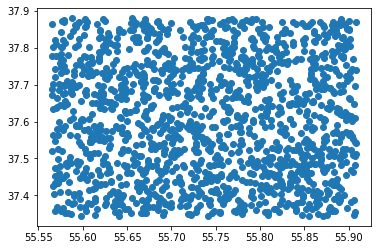

In [11]:
plt.scatter(data_moscow.latitude, data_moscow.longitude)

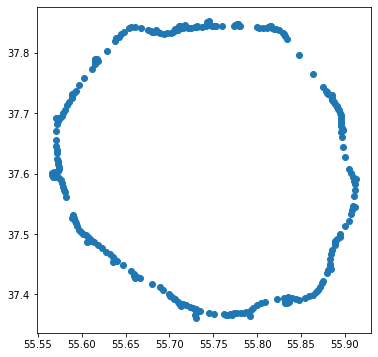

In [12]:
plt.figure(figsize=(6,6))
plt.scatter(mkad[:,0], mkad[:,1])

Модуль Path для работы с ломанными линиями

In [13]:
bbPath = mplPath.Path(mkad)

Отдельно сохраним маску объектов

In [14]:
in_map = data_moscow['points'].apply(lambda x: bbPath.contains_point(x))

Посмотрим на получившийся рисунок

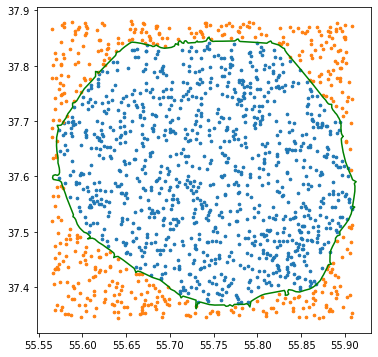

In [15]:
plt.figure(figsize=(6,6))
# plt.scatter(mkad[:,0], mkad[:,1])
plt.plot(mkad[:,0], mkad[:,1], c='green')

plt.scatter(data_moscow.latitude[in_map], data_moscow.longitude[in_map], s=7)
plt.scatter(data_moscow.latitude[~in_map], data_moscow.longitude[~in_map], s=7)
plt.show()

Заново отрисуем их на карте

In [16]:
moscow = folium.Map(location=mos_center, zoom_start=10, control_scale=True)

In [17]:
marker_cluster = MarkerCluster(locations=data_moscow[in_map].loc[::2, 'latitude':'longitude'].values)
marker_cluster.add_to(moscow)

In [18]:
moscow